<a href="https://colab.research.google.com/github/sk-aili/Practice/blob/main/simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression

In [ ]:
# Creating virtual environment
%pip install virtualenv
%python<version> -m venv <virtual-environment-name>
%source env/bin/activate

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import scipy
from matplotlib.pyplot import figure

In [ ]:
# load the data from the /input folder
soccer_data = "../input/EPL_Soccer_MLR_LR.csv"
df = pd.read_csv(soccer_data)

In [ ]:
# view top 3 observations from the soccer data
df.head(3)

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88


In [ ]:
# list out the columns
df.columns

Index(['PlayerName', 'Club', 'DistanceCovered(InKms)', 'Goals',
       'MinutestoGoalRatio', 'ShotsPerGame', 'AgentCharges', 'BMI', 'Cost',
       'PreviousClubCost', 'Height', 'Weight', 'Score'],
      dtype='object')

**Exploratory Data Analysis**

In [ ]:
# dataframe information - prints information about the dataframe including index, dtype and columns, non-null values, and memory usage.
# It can be used to get basic info, look for missing values, and get a sense of each variable's format.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


There are 202 rows, 13 columns in the dataset. Observe that there are no null values. Out of 13 columns, 10 are float type and 1 is integer type. The remaining 2 have object dtype.

**Descriptive statistics**    
To generate descriptive statistics pandas.dataframe.describe() funtion is used.    
*Descriptive statistics* include those that summarize the central tendency, dispersion, and shape of a dataset's distribution, excluding NaN values.

In [ ]:
df.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


<div style="background-color:#F5F5DC">
<br>


**Correlation**    
Correlation coefficient is used to measure the strength of relationship between two variables. It indicates that as the value of one variable changes the other variable changes in a specific direction with some magnitude. There are various ways to find correlation between two variables, one of which is Pearson correlation coefficient. Their strength of relationship is measured by the absolute value of coefficient, whereas the sign of the coefficient indicates the direction of the relationship.

<br>
</div>

In [ ]:
df.iloc[:, 2:].corr()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


The correlation between DistanceCovered(InKms) and the target variable score $-0.49$ indicates negative correlation.
The variable cost is related to the target variable with correlation coefficient $0.96$ which indicates strong positive relationship.

<div style="background-color:#F5F5DC">
<br>


Pearson correlation coefficient can only measure linear relationship between data.
The following data shows non linear relationship which can not be found by using pearson correlation coefficient. In such cases Spearman's correlation coefficient is used. It can be used to find nonlinear, monotonic relationships and for ordinal data.


<br>
</div>

<div style="background-color:#F5F5DC">
<br>


**Correlation does not imply Causation!!**

Some studies show that people in the UK spend more money on shopping when it's cold which shows correlation between two variables. Does this imply cold weather causes people to spend more money? The answer is NO. One of the possible explanations is that cold weather coincides with Christmas and new year sales, hence people shop more.

Correlation between two variables indicates association between two variables but it does not mean change in one variable is caused by another.


<br>
</div>

**Relationship between Cost and Score**

Score and Cost have a 96% correlation, making it a significant variable. Cost can be selected as the predictor variable for simple linear regression since the scatter plot between them will demonstrate a linear relationship.


To see this relationship visually, let's plot the scatter plot for Cost and Score.

Text(0.5, 1.0, 'Scatter plot between Cost and Score')

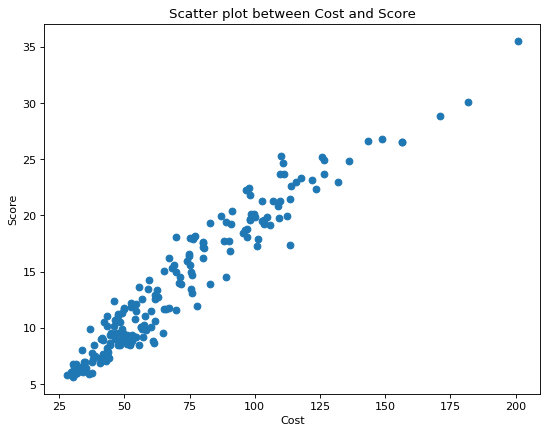

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(df['Cost'], df['Score'])

# label
plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Scatter plot between Cost and Score")

<div style="background-color:#F5F5DC">
<br>

The correlation between Cost and Score is easily visible here.

The Pearson correlation and scatter plot demonstrate that as the cost increases, so does the score. But what can we do with this knowledge?

How can we know how much money should be spent to achieve a specific score?
This is where Linear Regression comes in. It assists us in modeling the linear relationship between two or more variables so that we may foresee the results using the model.

Let's figure out how.


<br>
</div>

<div style="background-color:#F5F5DC">
<br>


**Train - Test Split**     
The data points are divided into two datasets, train and test, in a train test split method. The train data is used to train the model, and the model is then used to predict on the test data to see how the model performs on unseen data and whether it is overfitting or underfitting.


<br>
</div>

In [ ]:
# Assign X, y predictor and response variables
X = df['Cost']
y = df['Score']

# Splitting with 75% training and 25% testing dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.75,
    test_size=0.25,
    random_state=100)

<div style="background-color:#F5F5DC">
<br>


**Linear Regression: Scikit-learn vs Statsmodels**    
Scikit-learn's LinearRegression and Statsmodels' OLS (Ordinary Least Squares) are two popular libraries for linear regression in Python. While both can be used to perform linear regression, there are some differences between them:

* Model Fitting: Scikit-learn provides a simple API for model fitting. The fit method of the LinearRegression class takes in the input features and target variable, and returns the fitted model. On the other hand, Statsmodels provides a more detailed and statistically rigorous approach to model fitting with its OLS class, which allows users to specify various model assumptions, summary statistics and hypothesis testing.

* Model Summary: Scikit-learn provides only the coefficients and their standard errors, while Statsmodels provides a more detailed summary of the regression results, including R-squared, F-statistic, p-values, and confidence intervals for the coefficients. This can be useful for hypothesis testing and model selection.

* Model Evaluation: Scikit-learn provides several evaluation metrics for regression models, such as mean squared error, mean absolute error, and R-squared. Statsmodels provides similar metrics, but also offers the ability to run hypothesis tests on the coefficients, such as t-tests and F-tests, which are useful for model selection and inference.

* Speed: Scikit-learn's LinearRegression is optimized for speed, making it a good choice for large datasets. Statsmodels' OLS is less optimized for speed, and can be slower for large datasets.

In conclusion, when it comes to choosing between the two, it depends on the specific requirements of the project. If a simple, fast, and flexible linear regression model is needed, scikit-learn's LinearRegression is a good choice. If a more detailed statistical analysis of the regression results is needed, with the ability to perform hypothesis tests and perform detailed evaluation, then Statsmodels' OLS may be a better choice.


<br>
</div>

In [ ]:
# statsmodels approach to regression
# fit the model
lr = sm.OLS(y_train, X_train).fit()

# printing the parameters
lr.params

Cost    0.192891
dtype: float64

In [ ]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Score   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.167e+04
Date:                Tue, 23 May 2023   Prob (F-statistic):                   3.84e-144
Time:                        12:17:17   Log-Likelihood:                         -297.42
No. Observations:                 151   AIC:                                      596.8
Df Residuals:                     150   BIC:                                      599.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Cost           0.1929      0.002    108.014      0.000       0.189       0.196
==============================================================================
Omnibus:                        0.244   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.885   Jarque-Bera (JB):                0.054
Skew:                           0.021   Prob(JB):                        0.974
Kurtosis:                       3.083   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# force intercept term - as the statsmodels by default makes beta_0 = 0 intercept = 0
X_train_with_intercept = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_with_intercept).fit()
print(lr.params)
print(lr.summary())

const    0.947185
Cost     0.182083
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1976.
Date:                Tue, 23 May 2023   Prob (F-statistic):           6.91e-88
Time:                        12:19:32   Log-Likelihood:                -293.23
No. Observations:                 151   AIC:                             590.5
Df Residuals:                     149   BIC:                             596.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

**Model Summary**     
Now that we have successfully modeled let's evaluate the results and summary of the model:     
* $R^2$: The $R^2$ or the coefficient of determination is the proportion of the variance in the dependent variable that is explained from the independent variable(s). We got an $R^2$ of **0.93** which is pretty good.     
* Adjusted $R^2$: For linear models, adjusted $R^2$ is a corrected goodness-of-fit statistic. It determines the proportion of variance in the target field explained by the input(s). $R^2$ tends to overestimate the goodness-of-fit of the linear regression. It always grows as the number of independent variables in the model grows. It happens because we tend to deduct a large amount (due to multiple variables) to calculate error as the number of independent variable increases.

What would happen if we do not include constant while builing the linear regression model?

const    0.947185
Cost     0.182083
dtype: float64


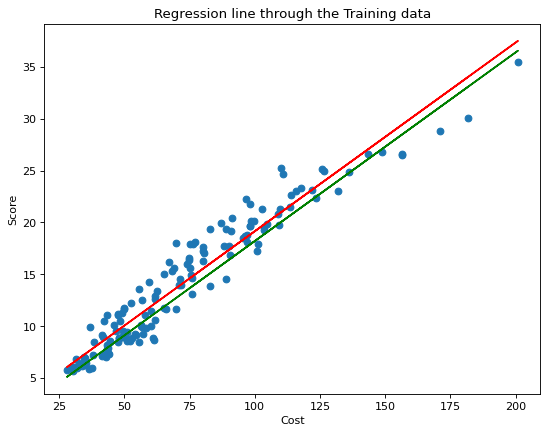

In [ ]:
# extract the beta_0, beta_1 from the fitted regression line
print(lr.params)
b0 = lr.params[0]
b1 = lr.params[1]

# plot the fitted line on training data
figure(figsize=(8,6), dpi=80)
plt.scatter(X_train, y_train)
plt.plot(X_train, b0+b1*X_train, 'r')

plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Regression line through the Training data")

plt.show()

In this plot, we are extracting the values of the intercept $\beta_0$ and coefficient/slope $\beta_1$ and plotting the regression line over the scatter plot of the Cost and Score of training data.

The regression line has a good fitting, it probably deviates a little after a cost of 125 or so, let's see if we can improve it in the later sections when we diagnose and remedy but first let's see how our model performs on the test data.

**Prediction on Test Data**

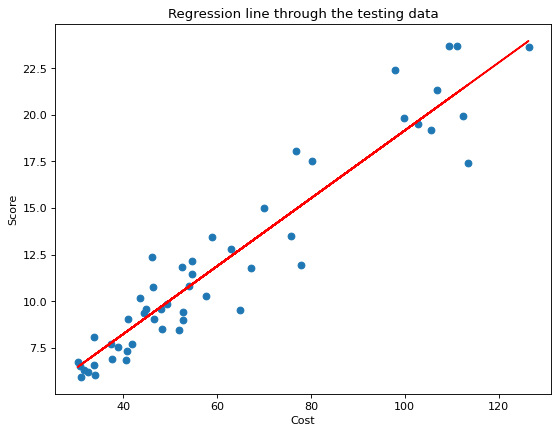

In [ ]:
# plot the fitted line on test data
X_test_with_intercept = sm.add_constant(X_test)
y_test_fitted = lr.predict(X_test_with_intercept)

# scatter plot on test data
figure(figsize=(8,6), dpi=80)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_fitted, 'r')

plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Regression line through the testing data")

plt.show()

Here we can see that the model has built a good regression fit as it is passing through the middle of all the points to get the minimum error.

Observe that all the data points in the test data lie in the range of the training data. This is called interpolation. What if we analyze a data point with a cost say 560? This is extrapolation and the model probably won't be robust to it.

<div style="background-color:#F5F5DC">
<br>


**Diagnostics**: To evaluate whether the linear regression model is a good fit for the pattern in the data.     

**Checklist**:    
- Non-linearity
- Non-constant variance
- Deviations from normality
- Errors that are not independent and identically distributed
- Outliers
- Missing Predictors

<br>
</div>

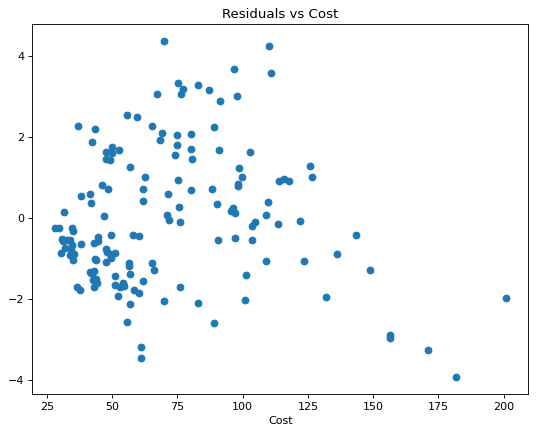

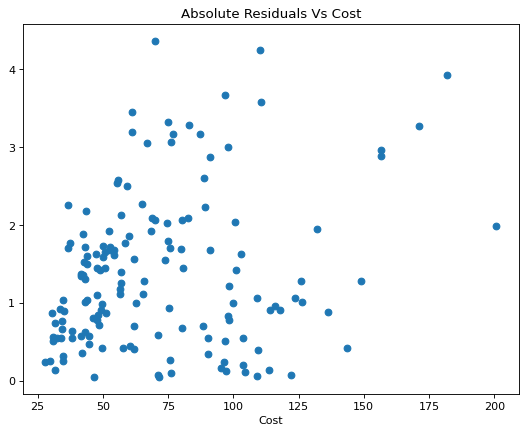

((array([-2.60603471, -2.28639722, -2.10324767, -1.97158309, -1.867224  ,
         -1.7799545 , -1.70445293, -1.63757876, -1.57731662, -1.52229259,
         -1.47152616, -1.42429196, -1.3800376 , -1.33833223, -1.29883298,
         -1.26126233, -1.22539231, -1.19103324, -1.1580255 , -1.12623343,
         -1.09554071, -1.06584677, -1.03706405, -1.0091158 , -0.98193434,
         -0.95545967, -0.92963831, -0.90442237, -0.87976879, -0.85563868,
         -0.83199678, -0.80881102, -0.78605212, -0.76369328, -0.74170987,
         -0.7200792 , -0.69878032, -0.67779383, -0.65710172, -0.6366872 ,
         -0.61653466, -0.59662946, -0.57695791, -0.55750713, -0.53826504,
         -0.51922023, -0.50036191, -0.48167989, -0.4631645 , -0.44480656,
         -0.42659733, -0.40852846, -0.39059201, -0.37278035, -0.35508619,
         -0.33750252, -0.32002258, -0.3026399 , -0.28534819, -0.26814138,
         -0.25101361, -0.23395916, -0.2169725 , -0.20004822, -0.18318105,
         -0.16636584, -0.14959754, -0.

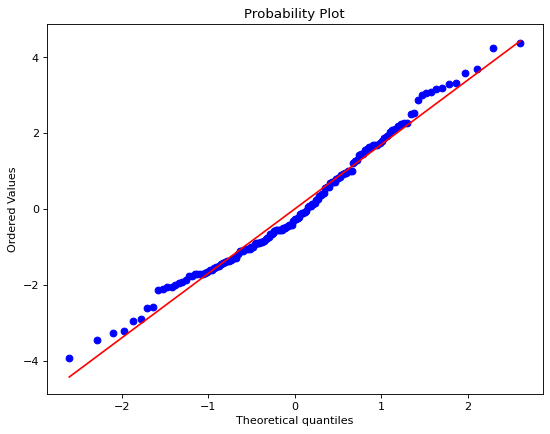

In [ ]:
# build predictions on training data
predictions_y = lr.predict(X_train_with_intercept)

# find residuals
r_i = (y_train - predictions_y)

# residuals vs predictor in training data
figure(figsize=(8,6), dpi=80)
plt.scatter(X_train, r_i)
plt.title("Residuals vs Cost")
plt.xlabel("Cost")
plt.show()


# Absolute residuals against predictor
abs_r_i = np.abs(y_train - predictions_y)
figure(figsize=(8,6), dpi=80)
plt.scatter(X_train, abs_r_i)
plt.title("Absolute Residuals Vs Cost")
plt.xlabel("Cost")
plt.show()

# Normality plot
figure(figsize=(8,6), dpi=80)
scipy.stats.probplot(r_i, plot=plt)

Tails might me a little heavy, but overall no clear reason to reject normality expectations. Evaluating normality through histogram of residuals

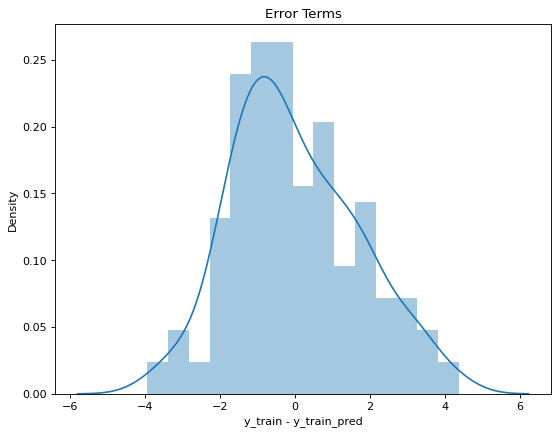

In [ ]:
figure(figsize=(8,6), dpi=80)
sns.distplot(r_i, bins=15)
plt.title("Error Terms")
plt.xlabel("y_train - y_train_pred")
plt.show()

Text(0.5, 1.0, 'Residual Boxplot')

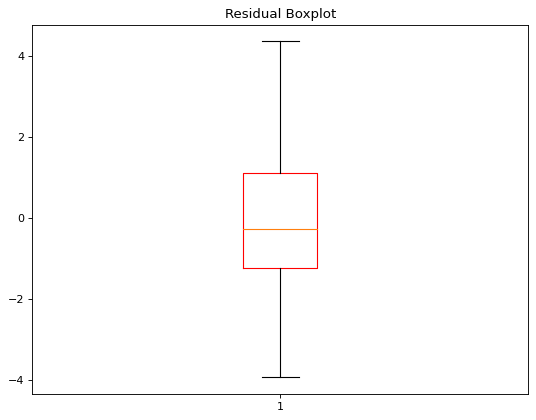

In [ ]:
# Boxplot for outliers
figure(figsize=(8,6), dpi=80)
plt.boxplot(r_i, boxprops=dict(color='red'))
plt.title("Residual Boxplot")

Here are the observations from the above plots:    
- the residuals vs cost plot shows a good scatter of residuals and no pattern is observed up until 125 or 150 costs. we can say that we have some heteroscedasticity in the higher costs. We'll see how we can tackle it.
- the normality of the errors can be seen in the normal probability plot and the histogram. It is more or less normal or bell shaped.
- the residual boxplot shows no obvious outliers

<div style="background-color:#F5F5DC">
<br>


**Transformations to avoid non-constant variance**    
Non-constant variance can be a problem in linear regression, as the assumption of constant variance of the errors is a key requirement for the ordinary least squares(OLS) method to be unbiased and efficient. When this assumption is violated, the regression coefficients can be inefficient and/or the predictions can be biased. To avoid non-constant variance(heteroscedasticity), there are different data transformations that can be applied.    
- Log transformation: This transformation is often used when the variance of the data increases with the mean. A log transformation can be used to stabilize the variance by converting the data into logarithmic values.
- Square root transformation: This transformation is also used to stabilize the variance by converting the data into square root values.
- Box-cox transformation: This is a statistical transformation that is used to stabilize the variance by transforming the data into values that are closer to a normal distribution. This transformation is a more flexible and powerful transformation compared to the log and square root transformations.
- Yeo-Johnson transformation: This is a newer and more flexible version of Box-cox transformation that can handle both positive and negative data values.


<br>
</div>

In [ ]:
# Demo of how to deal with non-constant variance through transformations
test_residuals = (y_test - y_test_fitted)
print(len(y_test))
print(len(y_test_fitted))
print(len(test_residuals))

51
51
51


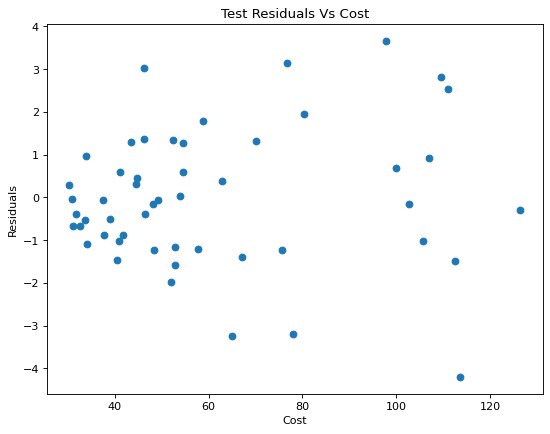

In [ ]:
# Residuals Vs Predictors in test set
figure(figsize=(8,6), dpi=80)
plt.title('Test Residuals Vs Cost')
plt.scatter(X_test, test_residuals)
plt.xlabel("Cost")
plt.ylabel("Residuals")
plt.show()

Here, we can see the scatter of data points increases as we increase the cost. This is evidence of Heteroscedasticity. We will try different transformations such as square root, log, and box-cox to see if we can introduce linearity with these transformations.

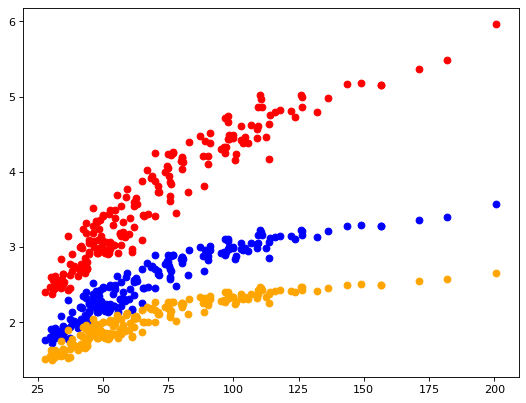

In [ ]:
# Try Sqrt
sqrt_y = np.sqrt(y)
figure(figsize=(8,6), dpi=80)
plt.scatter(X, sqrt_y, color="red")

# Try Log
ln_y = np.log(y)
plt.scatter(X, ln_y, color="blue")

# Try box-cox
bc_y = list(stats.boxcox(y))
bc_y = bc_y[0]
plt.scatter(X, bc_y, color="orange")

We can observe that the square root transformation denoted by red dots gives the most linear scatter of data points. Let's try to run the linear regression model on the transformed variable and analyze the change in results.

In [ ]:
# Run regression on this set
X_train, X_test, y_train, y_test = train_test_split(
    X, sqrt_y,
    train_size = 0.75,
    test_size = 0.25,
    random_state = 100
)

# force intercept term
X_train_with_intercept = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_with_intercept).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     1267.
Date:                Tue, 23 May 2023   Prob (F-statistic):           9.72e-75
Time:                        15:36:59   Log-Likelihood:                -17.200
No. Observations:                 151   AIC:                             38.40
Df Residuals:                     149   BIC:                             44.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9674      0.052     37.683      0.0

Here, we can see the change in $R^2$ and adjusted $R^2$ after the transformation. They are almost similar which suggests that $R^2$ is no longer overestimating the variance explained by the predictor variable.

const    1.967367
Cost     0.023433
dtype: float64


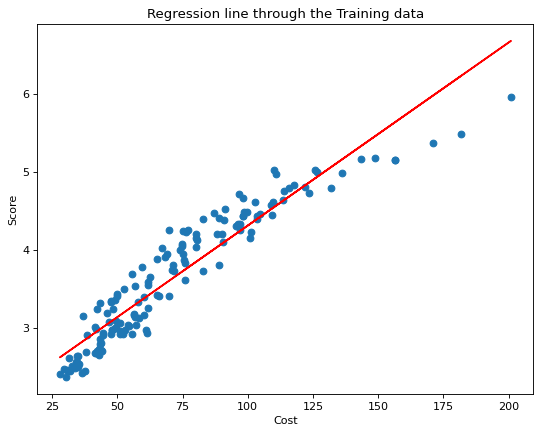

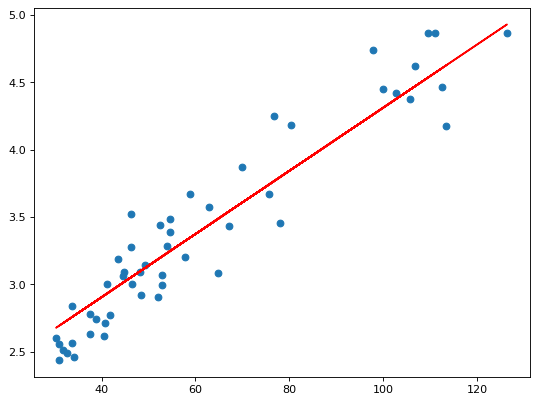

51
51
51


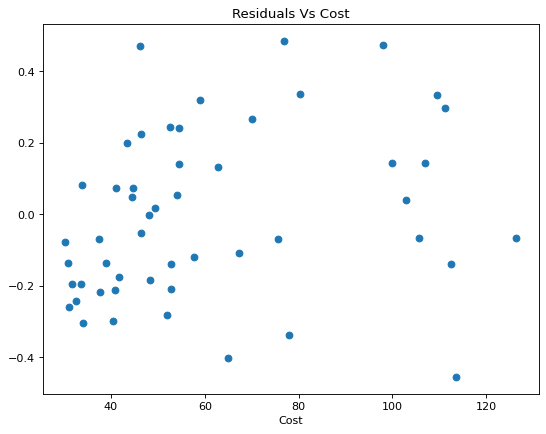

In [ ]:
# Extract the b0, b1
print(lr.params)
b0 = lr.params[0]
b1 = lr.params[1]

# Plot the fitted line on training data
figure(figsize=(8,6), dpi=80)
plt.scatter(X_train, y_train)
plt.plot(X_train, b0+b1*X_train, 'r')
plt.xlabel('Cost')
plt.ylabel('Score')
plt.title("Regression line through the Training data")
plt.show()


# Plot the fitted line on test data
X_test_with_intercept = sm.add_constant(X_test)
y_test_fitted = lr.predict(X_test_with_intercept)

figure(figsize=(8,6), dpi=80)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_fitted, 'r')
plt.show()


# Diagnostics: Evaluate variance
test_residuals = (y_test - y_test_fitted)
print(len(y_test))
print(len(y_test_fitted))
print(len(test_residuals))


# Plot Residuals vs Predictor
figure(figsize=(8,6), dpi=80)
plt.title("Residuals Vs Cost")
plt.scatter(X_test, test_residuals)
plt.xlabel("Cost")
plt.show()

Here's the same exercise but for the test dataset. Observe that the range of test data is within the train data and the maximum cost is 120, hence the regression line fits in the best way possible.

# Multiple Linear Regression

In [ ]:
# load the data from the /input folder
soccer_data = "../input/EPL_Soccer_MLR_LR.csv"
df = pd.read_csv(soccer_data)

**Correlation Matrix**

In [ ]:
corr = df.iloc[:, 2:].corr()
corr

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


**Correlation Heatmap**      
It is great for data analysis since they show differences and variances in the same data while making patterns clearly possible.

[Text(0.5, 0, 'DistanceCovered(InKms)'),
 Text(1.5, 0, 'Goals'),
 Text(2.5, 0, 'MinutestoGoalRatio'),
 Text(3.5, 0, 'ShotsPerGame'),
 Text(4.5, 0, 'AgentCharges'),
 Text(5.5, 0, 'BMI'),
 Text(6.5, 0, 'Cost'),
 Text(7.5, 0, 'PreviousClubCost'),
 Text(8.5, 0, 'Height'),
 Text(9.5, 0, 'Weight'),
 Text(10.5, 0, 'Score')]

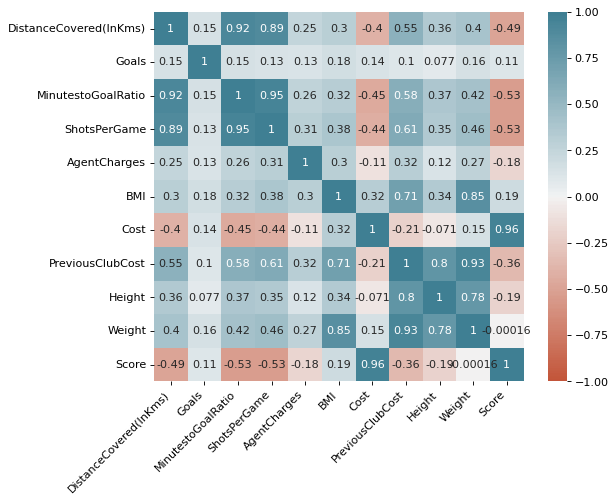

In [ ]:
# sns.heatmap(corr, vmin, vmax, cmap, annot, square)
plt.figure(figsize=(8,6), dpi=80)
ax = sns.heatmap(
    corr,
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(20,220,n=200),
    square= True,
    annot= True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

From the correlation heatmap, height and weight has -0.19 and 0.00016 respectively which are weakly correlated with Score (our dependent variable). Some are highly multicollinear predictors are:      
* MinutestoGoalRatio and ShotsPerGame -> Remove MinutestoGoalRatio
* PreviousClubCost, Height, Weight -> Discard height and weight, keep PreviousClubCost

In [ ]:
# Extract predictor variables and remove categorical variables
X = df[['DistanceCovered(InKms)', 'Goals',
       'ShotsPerGame', 'AgentCharges', 'BMI', 'Cost',
       'PreviousClubCost']]
y = df['Score']

**Train-Test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=100)

**Fit the linear regression model**

In [ ]:
X_train_with_intercept = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_with_intercept).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     476.6
Date:                Tue, 30 May 2023   Prob (F-statistic):           9.69e-96
Time:                        18:47:55   Log-Likelihood:                -252.91
No. Observations:                 151   AIC:                             521.8
Df Residuals:                     143   BIC:                             546.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9

We got coefficient of determination of 0.959 which is pretty great, and the difference between $R^2$ and Adjusted $R^2$ is not very significant which is also a great sign.      
Let's try to eliminate some variables and see if we can improve our results.

In [ ]:
# Can we trim some variables and see how it performs?
X_trimmed = df[['DistanceCovered(InKms)', 'BMI', 'Cost', 'PreviousClubCost']]
X_train, X_test, y_train, y_test = train_test_split(X_trimmed, y, train_size=0.75, test_size=0.25, random_state=100)

X_train_with_intercept = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_with_intercept).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     843.0
Date:                Tue, 30 May 2023   Prob (F-statistic):          9.28e-100
Time:                        18:47:56   Log-Likelihood:                -253.64
No. Observations:                 151   AIC:                             517.3
Df Residuals:                     146   BIC:                             532.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9

The AIC and BIC both dropped even though we couldn't see much change in $R^2$. This suggest this model is better than the previous one. Let's see if "Club" information can throw anything else for us.

**One-Hot Encoding**

In [ ]:
# Let's try throwing in club data using dummy variables
clubs = set(df.Club)
clubs

{'CHE', 'LIV', 'MUN'}

In [ ]:
nominal_features = pd.get_dummies(df['Club'], dtype=int)
nominal_features.head()

,CHE,LIV,MUN
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
df_encoded = pd.concat([df, nominal_features], axis=1)
df_encoded.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score,CHE,LIV,MUN
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75,0,0,1
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30,0,0,1
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88,0,0,1
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66,0,0,1
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64,0,0,1


In [ ]:
# Run with club encoding
X=df_encoded[['DistanceCovered(InKms)', 'BMI', 'Cost','PreviousClubCost','CHE','MUN','LIV']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25, random_state = 100)

X_train_with_intercept = sm.add_constant(X_train)

In [ ]:
lr = sm.OLS(y_train, X_train_with_intercept).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     691.4
Date:                Tue, 30 May 2023   Prob (F-statistic):          1.79e-103
Time:                        18:55:05   Log-Likelihood:                -237.58
No. Observations:                 151   AIC:                             489.2
Df Residuals:                     144   BIC:                             510.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3

Including the club feature significantly improved the model as we got $R^2$ as 0.966 and AIC and BIC dropped significantly.

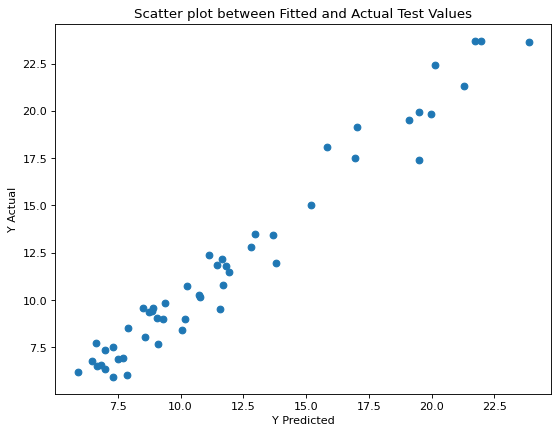

In [ ]:
#Look at model plot
plt.figure(figsize=(8, 6), dpi=80)
x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)

#plot the scatter plot between the fitted values and actual test values for repsonse variable
plt.scatter(y_test_fitted, y_test)
plt.xlabel("Y Predicted")
plt.ylabel("Y Actual")
plt.title("Scatter plot between Fitted and Actual Test Values")
plt.show()

<div style="background-color:#F5F5DC">
<br>

**Conclusion**    

With a Simple and Multiple Linear Regression problem statement, we learned the fundamentals of Linear regression by predicting the scores of soccer players. We grasped the assumptions for linear regression and how to diagnose and correct data errors related to the assumptions.     

**Linear Regression in Real Life**     
There are many real-world applications of linear regression, such as:
1. For professional sports teams, analysts use linear regression to gauge the impact of various training schedules on player performance. For instance data scientists in NBA may examine how various frequencies of yoga and weightlifting sessions each week affect a player's point total. With yoga and weighlifting sessions as the predictor variables and total points earned as the response variable, they could fit a multiple linear regression model.
2. A common method used by agricultural scientists to assess how fertilizer and water affect crop yields is Linear Regression. For instance, researchers may vary the water and fertilizer applications in various fields to observe the effects on crop yield. A multiple linear regression model can be used with crop yield as the target variable and fertilizer and water as the predictor variables.
3. Everything has a shelf life; humans are not an exception. We can store vast amounts of information about a person's medical history and estimate how long they will live thanks to ongoing improvements in medical science technology and diagnostic tools. The term "life expectancy" describes the number of years one can expect to live. This application is frequently used by insurance companies and public healthcare organizations to increase their productivity and achieve organizational goals.

<br>
</div>

<b><center>Thank you</center>
</br>
<center>Author: Sai Kumar Aili</center>
</b>